# Parte 2 del proyecto


In [1]:
import pandas as pd

dataset_general = pd.read_excel('../media/dataset_punto2.xlsx')

dataset_general.head(10)


,jornada,velocidad_produccion,consumo_energia
0,1,92,126.1
1,2,97,127.3
2,3,123,148.0
3,4,101,144.5
4,5,102,129.3
5,6,126,166.0
6,7,107,120.1
7,8,81,120.6
8,9,90,123.2
9,10,93,126.6


In [2]:
dataset_general.columns.values

array(['jornada', 'velocidad_produccion', 'consumo_energia'], dtype=object)

### Realice un análisis descriptivo de las variables involucradas:

In [4]:
# Calcule estadísticas descriptivas para el consumo energético y la velocidad de producción
import numpy as np

import pandas as pd


def get_mtc(dataset):
    
    columns = ['velocidad_produccion (Media)','consumo_energia (Media)','velocidad_produccion (mediana)','consumo_energia (mediana)','velocidad_produccion (Moda)','consumo_energia (Moda)']
    
    data = []

    data.append(dataset['velocidad_produccion'].mean())
    data.append(dataset['consumo_energia'].mean())
    data.append(dataset['velocidad_produccion'].median())
    data.append(dataset['consumo_energia'].median())
    data.append(dataset['velocidad_produccion'].mode()[0])
    data.append(dataset['consumo_energia'].mode()[0])


    data = np.array(data).reshape(1,-1) #Redimensionar para quedar en el mismo tamaño de las columnas
    
    dataset = pd.DataFrame(data=data, columns=columns)

    return dataset

dataset_mtc = get_mtc(dataset_general)

dataset_mtc

,velocidad_produccion (Media),consumo_energia (Media),velocidad_produccion (mediana),consumo_energia (mediana),velocidad_produccion (Moda),consumo_energia (Moda)
0,100.56,131.912,99.0,131.7,93.0,136.7


In [5]:
def get_dispersion_metrics(dataset):

    columns = ['velocidad_produccion (STD)','consumo_energia (STD)','velocidad_produccion (VAR)','consumo_energia (VAR)','velocidad_produccion (Range)','consumo_energia (Range)','velocidad_produccion (Cof_Var)','consumo_energia (Cof_Var)',]

    data = []

    data.append(dataset['velocidad_produccion'].std())
    data.append(dataset['consumo_energia'].std())
    data.append(dataset['velocidad_produccion'].var())
    data.append(dataset['consumo_energia'].var())
    data.append(dataset['velocidad_produccion'].max() - dataset['velocidad_produccion'].min())
    data.append(dataset['consumo_energia'].max() - dataset['consumo_energia'].min())
    data.append(dataset['velocidad_produccion'].std() / dataset['velocidad_produccion'].mean())
    data.append(dataset['consumo_energia'].std() / dataset['consumo_energia'].mean())

    data = np.array(data).reshape(1,-1)

    dataset = pd.DataFrame(columns=columns,data=data)

    return dataset


dataset_dispersion = get_dispersion_metrics(dataset_general)

dataset_dispersion

    

,velocidad_produccion (STD),consumo_energia (STD),velocidad_produccion (VAR),consumo_energia (VAR),velocidad_produccion (Range),consumo_energia (Range),velocidad_produccion (Cof_Var),consumo_energia (Cof_Var)
0,13.82863,14.037394,191.23102,197.048424,62.0,61.5,0.137516,0.106415


In [6]:
def get_form_metrics(dataset):
    
    columns = ['velocidad_produccion (Asimetria)','consumo_energia (Asimetria)','velocidad_produccion (Curtosis)','consumo_energia (Curtosis)']

    data = []

    data.append(dataset['velocidad_produccion'].skew())
    data.append(dataset['consumo_energia'].skew())
    data.append(dataset['velocidad_produccion'].kurtosis())
    data.append(dataset['consumo_energia'].kurtosis())

    
    data = np.array(data).reshape(1,-1)

    dataset = pd.DataFrame(columns=columns,data=data)

    return dataset


dataset_form = get_form_metrics(dataset_general)


dataset_form


,velocidad_produccion (Asimetria),consumo_energia (Asimetria),velocidad_produccion (Curtosis),consumo_energia (Curtosis)
0,0.196527,0.14852,-0.29868,-0.547057


### Historigrama

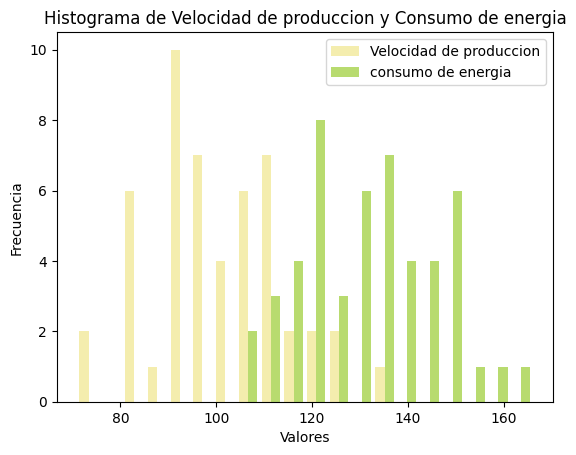

In [21]:
import matplotlib.pyplot as plt 

fig, ax_hist = plt.subplots()


def create_hist():
    #Creamos el diagrama el historigrama
    ax_hist.hist([dataset_general['velocidad_produccion'], dataset_general['consumo_energia']], #El primer argumento es la lista de los 2
                bins=20, alpha=0.7, label=['Velocidad de produccion', 'consumo de energia'],
                color=['khaki', 'yellowgreen']) #Aqui lo mismo

    # Etiquetas y texto
    ax_hist.set_xlabel('Valores')
    ax_hist.set_ylabel('Frecuencia')
    ax_hist.set_title('Histograma de Velocidad de produccion y Consumo de energia')
    ax_hist.legend()
    plt.show()


create_hist()

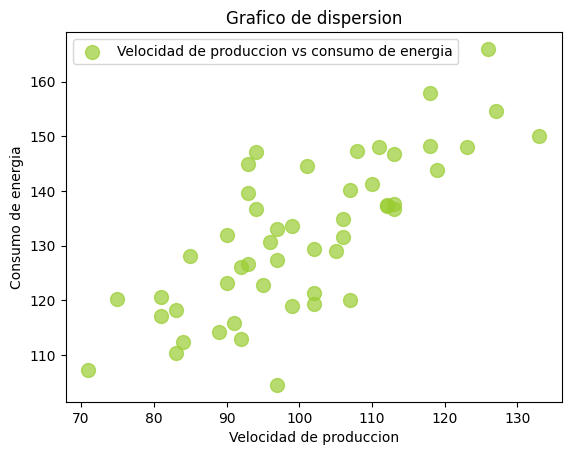

Visualmente podemos ver que hay un correlacion lineal positiva de las variables 


In [34]:
def create_scatter(dataset):
    #Creamos la instancia
    fig, ax_scatter = plt.subplots()

    #Se crea el grafico de dispersion
    ax_scatter.scatter(dataset['velocidad_produccion'],dataset['consumo_energia'],
                    alpha=0.7, 
                    label='Velocidad de produccion vs consumo de energia',s=100,color='yellowgreen')

    ax_scatter.set_xlabel('Velocidad de produccion')
    ax_scatter.set_ylabel("Consumo de energia")
    
    ax_scatter.set_title("Grafico de dispersion")
    ax_scatter.legend()
    plt.show()


create_scatter(dataset_general)
print('Visualmente podemos ver que hay un correlacion lineal positiva de las variables ')

#### Interpretar mas a detalle en la pagina web

## b) Determine el coeficiente de correlación entre el consumo energético y la velocidad de producción:

In [44]:
cof_correlation = np.corrcoef(dataset_general['velocidad_produccion'],dataset_general['consumo_energia'])

print(f'El coeficiente de correlacion entre las 2 variables es de {np.round(cof_correlation[0,1],3)},\npor lo tanto hay CORRELACION LINEAL ALTA.')


El coeficiente de correlacion entre las 2 variables es de 0.764,
por lo tanto hay CORRELACION LINEAL ALTA.


### Realice una prueba de hipótesis para determinar si la correlación es estadísticamente significativa

In [ ]:
#TO DO

### Interprete el resultado en el contexto del problema (Pagina web)

## Crear una regresion lineal

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd


In [45]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score
import numpy as np

def recomendar_modelo_regresion(df, var_x, var_y):
    X = df[[var_x]].values
    y = df[var_y].values

    modelos = {
        'Regresión Lineal': LinearRegression(),
        'Ridge': Ridge(alpha=1.0),
        'Lasso': Lasso(alpha=0.1)
    }

    resultados = {}

    print("\n--- Evaluación de modelos (R² con cross-validation) ---\n")
    for nombre, modelo in modelos.items():
        scores = cross_val_score(modelo, X, y, cv=5, scoring='r2')
        promedio = np.mean(scores)
        resultados[nombre] = promedio
        print(f"{nombre}: R² promedio = {promedio:.4f}")

    mejor_modelo = max(resultados, key=resultados.get)
    print(f"\n✅ Modelo recomendado: {mejor_modelo}")

    return mejor_modelo


recomendar_modelo_regresion(dataset_general,'velocidad_produccion','consumo_energia')


--- Evaluación de modelos (R² con cross-validation) ---

Regresión Lineal: R² promedio = 0.4171
Ridge: R² promedio = 0.4171
Lasso: R² promedio = 0.4171

✅ Modelo recomendado: Regresión Lineal


'Regresión Lineal'